In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, '../')
sys.path.insert(0, '../python_src/')

import numpy as np
import numpy.random as rand
import scipy as sp
import gzip
import pickle
import itertools as it
import shelve
import glob

import network_generation as ngen

import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib import collections as mc
import network_plot as nplot

In [2]:
DIM = 2
NN = 2**7
Lp = -1.0
label = "2d_harmonic/poly_uniform/state_N{:08d}_Lp{:.4f}".format(NN, Lp)
rad = 1/np.sqrt(2.0)

# DIM = 3
# NN = 2**10
# Lp = -1.0
# label = "3d_harmonic/bi/state_N{:08d}_Lp{:.4f}".format(NN, Lp)
# rad = 1/2.0**(1.0/3.0)


src_fn = "/home/rocks/data/network_periodic_jammed/network_{}D_N{:05d}_Lp{:.2f}".format(DIM, NN, Lp)

db_fn = "/home/rocks/data/network_finite_ball/network_{}D_N{:05d}_Lp{:.2f}".format(DIM, NN, Lp)


with shelve.open(db_fn) as db:
    
    for index in range(32):

        print(index)
        net = ngen.load_network(src_fn, index)
        net = ngen.make_finite(net)
        net = ngen.make_ball(net, rad)         
        net = ngen.prune_zero_modes(net)
        print("NN:", net['NN'])

        
        db["{}".format(index)] = net

0
Removing 0 / 128 nodes and 42 / 350 edges...
Removed 0 / 128 nodes and 42 / 350 edges.
Removing 76 / 128 nodes and 0 / 308 edges...
Removed 76 / 128 nodes and 189 / 308 edges.
[-7.21110255 -7.21110255 -1.          0.0447323   0.07914492  0.10752428
  0.11680179  0.14018892  0.17457374  0.18428416  0.2209897   0.24204787
  0.2585435   0.34020623  0.34661134  0.42942825  0.45632845  0.52048832
  0.57466248]
Min eval: 0.04473229895909961
NN: 52
1
Removing 0 / 128 nodes and 42 / 349 edges...
Removed 0 / 128 nodes and 42 / 349 edges.
Removing 77 / 128 nodes and 0 / 307 edges...
Removed 77 / 128 nodes and 191 / 307 edges.
[-7.14142843 -7.14142843 -1.          0.03542968  0.07340476  0.1034508
  0.11119964  0.1383718   0.16972449  0.21952797  0.2304336   0.259515
  0.28449866  0.29905472  0.32003825  0.36531835  0.37958772  0.48782042
  0.53342337]
Min eval: 0.03542967574265768
NN: 51
2
Removing 0 / 128 nodes and 43 / 357 edges...
Removed 0 / 128 nodes and 43 / 357 edges.
Removing 78 / 128 

Removing 1 / 49 nodes and 0 / 109 edges...
Removed 1 / 49 nodes and 2 / 109 edges.
[-6.92820323e+00 -6.92820323e+00 -1.00000000e+00  1.82862153e-16
  6.09288532e-02  7.63063584e-02  1.14310481e-01  1.22912542e-01
  1.42892679e-01  1.64636184e-01  1.84606200e-01  2.05818199e-01
  2.38902546e-01  2.57517825e-01  3.06884772e-01  3.33844652e-01
  4.15933759e-01  4.90810014e-01  5.62557948e-01]
Min eval: 1.828621532527633e-16
Removing 1 / 48 nodes and 0 / 107 edges...
Removed 1 / 48 nodes and 1 / 107 edges.
[-6.8556546  -6.8556546  -1.          0.06095094  0.0767725   0.11483166
  0.12459141  0.14622999  0.17389864  0.18787731  0.20584161  0.24459969
  0.26070229  0.31395864  0.37529782  0.41707023  0.49135765  0.58058508
  0.59004926]
Min eval: 0.06095093979761574
NN: 47
20
Removing 0 / 128 nodes and 40 / 355 edges...
Removed 0 / 128 nodes and 40 / 355 edges.
Removing 80 / 128 nodes and 0 / 315 edges...
Removed 80 / 128 nodes and 206 / 315 edges.
[-6.92820323 -6.92820323 -1.          0.056

In [63]:
DIM = 2
NN = 2**7
Lp = -1.0

db_fn = "/home/rocks/data/network_finite_ball/network_{}D_N{:05d}_Lp{:.2f}".format(DIM, NN, Lp)
index = 4

net = ngen.load_network(db_fn, index)

DIM = net['DIM']
   
NN = net['NN']
node_pos = net['node_pos']
L = net['box_L']

NE = net['NE']
edgei = net['edgei']
edgej = net['edgej']

boundary = net['boundary']


Z = np.zeros(NN, float)

print(NE, NN)

for b in range(NE):
    Z[edgei[b]] += 1
    Z[edgej[b]] += 1
    
print(Z)

309 128
[5. 5. 5. 2. 4. 5. 5. 6. 2. 5. 4. 5. 6. 5. 5. 5. 3. 5. 5. 6. 6. 3. 4. 5.
 4. 4. 3. 4. 3. 3. 3. 5. 5. 5. 4. 5. 3. 4. 4. 2. 6. 6. 6. 5. 3. 6. 3. 5.
 5. 6. 5. 6. 2. 5. 5. 5. 4. 5. 4. 6. 5. 6. 3. 6. 5. 6. 6. 5. 6. 6. 4. 5.
 6. 6. 6. 6. 2. 6. 6. 2. 3. 6. 4. 6. 5. 6. 6. 2. 6. 4. 6. 6. 6. 5. 6. 5.
 5. 6. 5. 6. 3. 6. 3. 3. 6. 5. 6. 6. 5. 2. 6. 5. 6. 6. 3. 5. 5. 6. 6. 5.
 3. 5. 6. 5. 6. 6. 6. 6.]


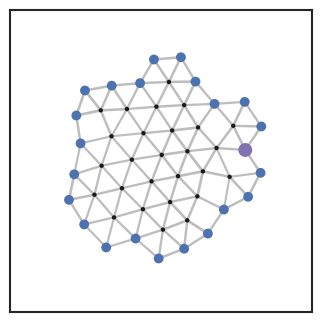

In [84]:
sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100})

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(1, 1, 1, aspect=1.0)
gray = "#bdbdbd"

########################################################3

DIM = 2
NN = 128
Lp = -1.0

db_fn = "/home/rocks/data/network_finite_ball/network_{}D_N{:05d}_Lp{:.2f}".format(DIM, NN, Lp)
index = 4

net = ngen.load_network(db_fn, index)
boundary = net['boundary']

# print(len(net['node_map']), net['NN'])
# print(net['node_map'])

(inodei, inodej) = ngen.choose_boundary_edge(net, -20)

inodesi = [inodei]
inodesj = [inodej]

(onodei, onodej) = ngen.choose_boundary_edge(net, -20+180)

onodesi = [onodei]
onodesj = [onodej]


net = ngen.convert_to_network_object(net, periodic=False)

NV = net.NN
NE = net.NE
edgei = net.edgei
edgej = net.edgej
K = net.K
scale = 1.0

vert_pos = np.array(net.node_pos, float)
L = np.array(net.L, float)

styles = {edge: {} for edge in range(net.NE)}

knorm = mcolors.Normalize(vmin = 0.0, vmax = np.max(K))
for b in range(len(K)):
    styles[b]['lw'] = 2.0*scale*knorm(K[b])
    styles[b]['color'] = gray


nplot.show_network(ax1, net, styles=styles, alpha=1.0)



styles = {}
for node in range(net.NN):    
    styles[node] = {}
    styles[node]['size'] = 10
    
for node in boundary:
    styles[node]['color'] = 'b'
    styles[node]['size'] = 50
    
    
# for i in inodesi:
#     styles[i] = {}
#     styles[i]['color'] = 'r'
# for i in inodesj:
#     styles[i] = {}
#     styles[i]['color'] = 'r'
    
# for i in onodesi:
#     styles[i] = {}
#     styles[i]['color'] = 'g'
# for i in onodesj:
#     styles[i] = {}
#     styles[i]['color'] = 'g'
        
nplot.show_nodes(ax1, net, list(styles.keys()), styles=styles, marker='o')

# nplot.show_vecs(ax1, net, 1.5*vec)

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

plt.show()

In [36]:
DIM = 3
NN = 2**10
Lp = -1.0

db_fn = "/home/rocks/data/network_finite_ball/network_{}D_N{:05d}_Lp{:.2f}".format(DIM, NN, Lp)
index = 2

net = ngen.load_network(db_fn, index)

DIM = net['DIM']
   
NN = net['NN']
node_pos = net['node_pos']
L = net['box_L']

NE = net['NE']
edgei = net['edgei']
edgej = net['edgej']

boundary = net['boundary']


f = open("/home/rocks/proj_mech_persistence/test2.pdb", "w+")

for i in range(NN):
    
    line = "{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}".format("ATOM", i, "A", "", "AAA", "A", 1, "", *node_pos[DIM*i:DIM*i+DIM], 1.0, 0.0, "A", "")
    
    print(line)

    f.write(line+"\n")

for i in range(NE):
    line = "{:6s}{:5d}{:4d}".format("CONECT", edgei[i], edgej[i])
    
    print(line)

    f.write(line+"\n")
    
    line = "{:6s}{:5d}{:4d}".format("CONECT", edgej[i], edgei[i])
    
    print(line)

    f.write(line+"\n")
    
f.write("END\n")
f.close()

ATOM      0  A   AAA A   1       4.785   5.073   7.278  1.00  0.00           A  
ATOM      1  A   AAA A   1       5.832   2.004   2.832  1.00  0.00           A  
ATOM      2  A   AAA A   1       2.669   5.169   4.007  1.00  0.00           A  
ATOM      3  A   AAA A   1       2.558   3.728   3.349  1.00  0.00           A  
ATOM      4  A   AAA A   1       4.777   3.500   2.153  1.00  0.00           A  
ATOM      5  A   AAA A   1       6.378   4.326   2.753  1.00  0.00           A  
ATOM      6  A   AAA A   1       2.921   1.522   3.621  1.00  0.00           A  
ATOM      7  A   AAA A   1       1.668   2.740   3.808  1.00  0.00           A  
ATOM      8  A   AAA A   1       4.529   4.565   6.701  1.00  0.00           A  
ATOM      9  A   AAA A   1       2.423   4.893   2.668  1.00  0.00           A  
ATOM     10  A   AAA A   1       7.130   5.536   5.126  1.00  0.00           A  
ATOM     11  A   AAA A   1       1.918   2.878   4.576  1.00  0.00           A  
ATOM     12  A   AAA A   1  

CONECT  172 194
CONECT  199 172
CONECT  172 199
CONECT  201  68
CONECT   68 201
CONECT  201 240
CONECT  240 201
CONECT  227  57
CONECT   57 227
CONECT  227 237
CONECT  237 227
CONECT  253 237
CONECT  237 253
CONECT   15 201
CONECT  201  15
CONECT   84 199
CONECT  199  84
CONECT  146  68
CONECT   68 146
CONECT  163 240
CONECT  240 163
CONECT    2 176
CONECT  176   2
CONECT    2 252
CONECT  252   2
CONECT   13  87
CONECT   87  13
CONECT   13 218
CONECT  218  13
CONECT   13 229
CONECT  229  13
CONECT   13 239
CONECT  239  13
CONECT   20 176
CONECT  176  20
CONECT   20 218
CONECT  218  20
CONECT   20 236
CONECT  236  20
CONECT   20 252
CONECT  252  20
CONECT   31 218
CONECT  218  31
CONECT   39 200
CONECT  200  39
CONECT   39 252
CONECT  252  39
CONECT   56 176
CONECT  176  56
CONECT   67 218
CONECT  218  67
CONECT   67 252
CONECT  252  67
CONECT  113  87
CONECT   87 113
CONECT  149 218
CONECT  218 149
CONECT  149 229
CONECT  229 149
CONECT  156 217
CONECT  217 156
CONECT  156 236
CONECT  

In [ ]:
ATOM      1  N   GLY A   3      17.119   0.186  36.320  1.00 64.10           N  
ATOM      2  CA  GLY A   3      16.944  -0.800  35.208  1.00 63.46           C  
ATOM      3  C   GLY A   3      16.818  -0.087  33.851  1.00 61.22           C  
ATOM      4  O   GLY A   3      15.721   0.337  33.463  1.00 62.81           O  
ATOM      5  N   PRO A   4      17.944   0.077  33.129  1.00 57.39           N  
ATOM      6  CA  PRO A   4      17.950   0.742  31.815  1.00 53.27           C  
ATOM      7  C   PRO A   4      18.005  -0.247  30.629  1.00 49.78           C  
ATOM      8  O   PRO A   4      19.086  -0.678  30.218  1.00 48.17           O  
ATOM      9  CB  PRO A   4      19.191   1.613  31.898  1.00 54.33           C  
ATOM     10  CG  PRO A   4      20.161   0.686  32.625  1.00 55.45           C  
ATOM     11  CD  PRO A   4      19.305   0.019  33.701  1.00 55.83           C  